In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from model import optimize_beds
from parameters import gen_patients

sns.set_theme(palette="rocket")

In [3]:
def graph_by_metrics(graph_metrics):
    # graph_metrics = pd.read_csv(f"analysis_per_blocks/metrics_by_block_{w1}_{w2}_{w3}.csv")
    fig, axes = plt.subplots(2, 2, sharex=True, figsize=(9, 9))
    fig.suptitle('Métricas durante el día')
    axes[0,0].set_title("Cambios por bloque")
    sns.lineplot(x="time", y="changes_per_block", data=graph_metrics, ax=axes[0, 0], linewidth=3)
    axes[1,1].set_title("Distancia por bloque")
    sns.lineplot(x="time", y="dist_per_block", data=graph_metrics, ax=axes[1, 1], linewidth=3)
    axes[0,1].set_title("Pacientes no ideales por bloque")
    sns.lineplot(x="time", y="not_ideals_per_block", data=graph_metrics, ax=axes[0, 1], linewidth=3)
    axes[1,0].set_title("Pacientes por bloque")
    sns.lineplot(x="time", y="patients_per_block", data=graph_metrics, ax=axes[1, 0], linewidth=3)

Comprobemos el modo no determinista:

In [2]:
for _ in range(4):
    print(gen_patients(4, deterministic=False))

((0, 1, 2, 3), (3, 3, 3, 2), (2, 0, 2, 7), (0, 0, 0, 0), (5, 11, 11, 11), (False, True, False, True), (9, 5, 7, 3))
((0, 1, 2, 3), (1, 1, 3, 3), (0, 1, 3, 2), (9, 0, 0, 0), (11, 6, 11, 11), (False, False, False, False), (4, 3, 5, 1))
((0, 1, 2, 3), (3, 3, 3, 3), (2, 2, 0, 0), (0, 0, 0, 0), (11, 11, 11, 11), (True, True, False, False), (6, 7, 4, 2))
((0, 1, 2, 3), (2, 3, 1, 3), (0, 5, 2, 5), (0, 10, 0, 0), (11, 11, 11, 11), (False, False, True, True), (5, 3, 10, 3))


i = 0, total_distance = 9715, beds_changed = 10, not_ideal = 42
i = 1, total_distance = 11215, beds_changed = 2, not_ideal = 138
i = 2, total_distance = 10720, beds_changed = 8, not_ideal = 118


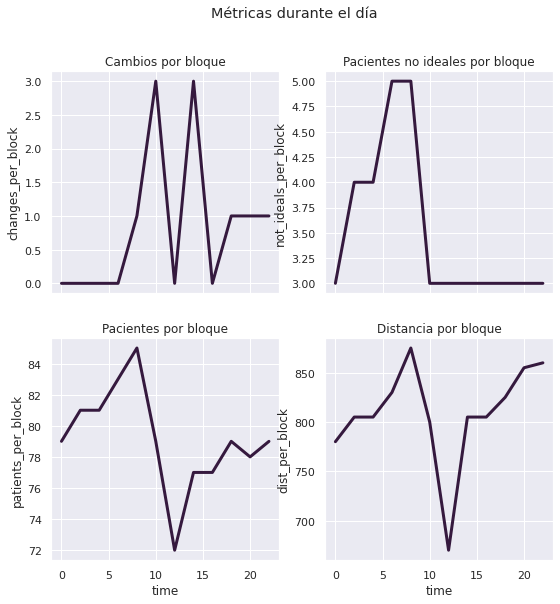

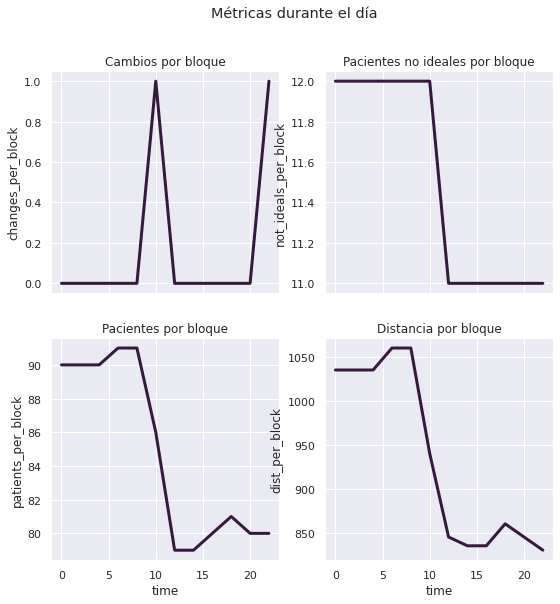

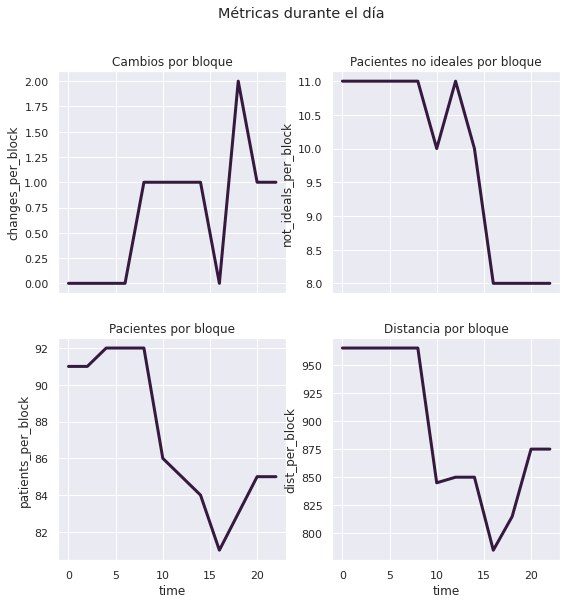

In [5]:
summary_metrics, block_metrics = [], []
for i in range(3):
    general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 5, 25, 35], deterministic=False)
    total_distance = general_metrics["total_distance"]
    beds_changed = general_metrics["beds_changed"]
    not_ideal = general_metrics["not_ideal"]
    
    print(f"{i = }, {total_distance = }, {beds_changed = }, {not_ideal = }")
    
    graph_by_metrics(metrics_by_block)

    general_metrics.update({"i": i})

    summary_metrics.append(general_metrics)
    block_metrics.append(metrics_by_block)

In [6]:
summary_metrics, block_metrics = [], []
for n_beds in range(100, 151, 15):
    for n_patients in range(70, 111, 15):
        general_metrics, metrics_by_block = optimize_beds(n_beds, n_patients, [1, 5, 25, 35], deterministic=False)
        total_distance = general_metrics["total_distance"]
        beds_changed = general_metrics["beds_changed"]
        not_ideal = general_metrics["not_ideal"]
        
        print(f"{n_patients = }, {n_beds = }, {total_distance = }, {beds_changed = }, {not_ideal = }")
        
        general_metrics.update({"i": i})

        summary_metrics.append(general_metrics)
        block_metrics.append(metrics_by_block)

n_patients = 70, n_beds = 100, total_distance = 5245, beds_changed = 5, not_ideal = 60
n_patients = 85, n_beds = 100, total_distance = 9590, beds_changed = 4, not_ideal = 87
n_patients = 100, n_beds = 100, total_distance = 10255, beds_changed = 11, not_ideal = 153
n_patients = 70, n_beds = 115, total_distance = 7005, beds_changed = 4, not_ideal = 135
n_patients = 85, n_beds = 115, total_distance = 8510, beds_changed = 0, not_ideal = 145
n_patients = 100, n_beds = 115, total_distance = 11645, beds_changed = 10, not_ideal = 130
n_patients = 70, n_beds = 130, total_distance = 5530, beds_changed = 6, not_ideal = 113
n_patients = 85, n_beds = 130, total_distance = 8700, beds_changed = 4, not_ideal = 99
n_patients = 100, n_beds = 130, total_distance = 10755, beds_changed = 4, not_ideal = 108
n_patients = 70, n_beds = 145, total_distance = 7905, beds_changed = 3, not_ideal = 113
n_patients = 85, n_beds = 145, total_distance = 9815, beds_changed = 10, not_ideal = 68
n_patients = 100, n_beds = 

### Try with minimum distance

In [7]:
summary_metrics_m, block_metrics_m = [], []
for i in range(5):
    general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 5, 15, 33], deterministic=False)
    total_distance = general_metrics["total_distance"]
    beds_changed = general_metrics["beds_changed"]
    not_ideal = general_metrics["not_ideal"]
    
    print(f"{i = }, {total_distance = }, {beds_changed = }, {not_ideal = }")
    
    graph_by_metrics(metrics_by_block)

    general_metrics.update({"i": i})

    summary_metrics_m.append(general_metrics)
    block_metrics_m.append(metrics_by_block)

i = 0, total_distance = 9305, beds_changed = 16, not_ideal = 147
i = 1, total_distance = 9305, beds_changed = 16, not_ideal = 147
